# Data Preparation

In [1]:
# load libraries and customize settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max.columns', None)

import warnings
warnings.filterwarnings('ignore')

from matplotlib import rcParams
rcParams['figure.figsize'] = [8, 6]

In [2]:
# load and preview dataset
df = pd.read_csv('bestsellers with categories.csv')
df.sample(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
359,The Daily Show with Jon Stewart Presents Earth...,Jon Stewart,4.4,440,11,2010,Non Fiction
402,The Help,Kathryn Stockett,4.8,13871,6,2009,Fiction
260,Outliers: The Story of Success,Malcolm Gladwell,4.6,10426,20,2009,Non Fiction
268,Pokémon Deluxe Essential Handbook: The Need-to...,Scholastic,4.7,3503,9,2016,Fiction
540,Wonder,R. J. Palacio,4.8,21625,9,2013,Fiction


In [3]:
# preview basic dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


This dataset has 550 records and 7 variables. Each variable has 550 non-null values, meaning there are no missing values. Three variables (Name, Author, and Genre) are of object data type while the rest are numerical in nature. 

In [4]:
# check for duplicated values
df.duplicated().any()

False

In [5]:
# exploring the unique values of each variable
columns = df.columns.to_list()

for column in columns:
    print("Showing results for variable {}".format(column))
    print("Number of unique values:", df[column].nunique())
    print(df[column].unique())
    print()

Showing results for variable Name
Number of unique values: 351
['10-Day Green Smoothie Cleanse' '11/22/63: A Novel'
 '12 Rules for Life: An Antidote to Chaos' '1984 (Signet Classics)'
 '5,000 Awesome Facts (About Everything!) (National Geographic Kids)'
 'A Dance with Dragons (A Song of Ice and Fire)'
 'A Game of Thrones / A Clash of Kings / A Storm of Swords / A Feast of Crows / A Dance with Dragons'
 'A Gentleman in Moscow: A Novel'
 'A Higher Loyalty: Truth, Lies, and Leadership'
 'A Man Called Ove: A Novel'
 "A Patriot's History of the United States: From Columbus's Great Discovery to the War on Terror"
 'A Stolen Life: A Memoir' 'A Wrinkle in Time (Time Quintet)'
 'Act Like a Lady, Think Like a Man: What Men Really Think About Love, Relationships, Intimacy, and Commitment'
 'Adult Coloring Book Designs: Stress Relief Coloring Book: Garden Designs, Mandalas, Animals, and Paisley Patterns'
 'Adult Coloring Book: Stress Relieving Animal Designs'
 'Adult Coloring Book: Stress Relievin

There doesn't seem to be any weird data such as duplicated values where one is the misspelled version of the other, so we will now move on to data exploration.

# Data Exploration & Visualization

In [6]:
# getting the summary statistics
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


User ratings range from 3.3 to 4.9. <br>
Reviews range from 37 to 87841.<br>
Price ranges from 0 to 105.

In [7]:
# previewing distribution of year 
df.Year.value_counts()

2019    50
2018    50
2017    50
2016    50
2015    50
2014    50
2013    50
2012    50
2011    50
2010    50
2009    50
Name: Year, dtype: int64

The number of records are evenly distributed across the years, 50 per year.

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64


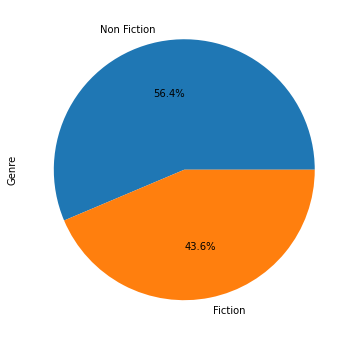

In [8]:
# percentage of fiction to non fiction
df.Genre.value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
print(df.Genre.value_counts())

Non fiction books outnumber fiction books 310 to 240.

In [9]:
# top 10 best-performing authors according to user rating
df.groupby('Author')['User Rating'].mean().sort_values(ascending = False)[:10]

Author
Jill Twiss              4.9
Bill Martin Jr.         4.9
Nathan W. Pyle          4.9
Patrick Thorpe          4.9
Lin-Manuel Miranda      4.9
Sherri Duskey Rinker    4.9
Chip Gaines             4.9
Alice Schertle          4.9
Pete Souza              4.9
Rush Limbaugh           4.9
Name: User Rating, dtype: float64

In [10]:
# top 10 best-performing authors according to number of reviews
df.groupby('Author')['Reviews'].mean().sort_values(ascending = False)[:10]

Author
Delia Owens       87841.0
Paula Hawkins     79446.0
Michelle Obama    61133.0
Gillian Flynn     57271.0
Kristin Hannah    49288.0
John Green        42083.8
Andy Weir         39459.0
Anthony Doerr     36348.0
Paulo Coelho      35799.0
Donna Tartt       33844.0
Name: Reviews, dtype: float64

In [11]:
# top 10 best-performing authors by both user rating and number of reviews
df.groupby('Author')[['User Rating', 'Reviews']].mean().sort_values(['User Rating', 'Reviews'],
                                                                    ascending = False)[:10]

,User Rating,Reviews
Author,,
Bill Martin Jr.,4.9,14344.0
Jill Twiss,4.9,11881.0
Nathan W. Pyle,4.9,9382.0
Emily Winfield Martin,4.9,8842.0
Chip Gaines,4.9,7861.0
Sherri Duskey Rinker,4.9,7038.0
Lin-Manuel Miranda,4.9,5867.0
Rush Limbaugh,4.9,5493.0
Patrick Thorpe,4.9,5396.0


In [12]:
# best author overall
df.groupby('Author')[['User Rating', 'Reviews']].mean().sort_values(['User Rating', 'Reviews'],
                                                                    ascending = False)[:1]

,User Rating,Reviews
Author,,
Bill Martin Jr.,4.9,14344.0


In [13]:
# top 10 books according to number of reviews
df.groupby('Name')['Reviews'].mean().sort_values(ascending = False)[:10]

Name
Where the Crawdads Sing                                                                     87841.0
The Girl on the Train                                                                       79446.0
Becoming                                                                                    61133.0
Gone Girl                                                                                   57271.0
The Fault in Our Stars                                                                      50482.0
The Nightingale: A Novel                                                                    49288.0
Fifty Shades of Grey: Book One of the Fifty Shades Trilogy (Fifty Shades of Grey Series)    47265.0
The Martian                                                                                 39459.0
All the Light We Cannot See                                                                 36348.0
The Alchemist                                                                               357

In [14]:
# top 10 books according to user ratings
df.groupby('Name')['User Rating'].mean().sort_values(ascending = False)[:10]

Name
Strange Planet (Strange Planet Series)                                                                                     4.9
Unfreedom of the Press                                                                                                     4.9
Little Blue Truck                                                                                                          4.9
Last Week Tonight with John Oliver Presents A Day in the Life of Marlon Bundo (Better Bundo Book, LGBT Childrens Book)    4.9
The Wonderful Things You Will Be                                                                                           4.9
Humans of New York : Stories                                                                                               4.9
Dog Man and Cat Kid: From the Creator of Captain Underpants (Dog Man #4)                                                   4.9
Dog Man: A Tale of Two Kitties: From the Creator of Captain Underpants (Dog Man #3)                       

In [15]:
# best selling books of the year based on both user rating and number of reviews
df.groupby('Name')[['User Rating', 'Reviews']].mean().sort_values(['User Rating', 'Reviews'],
                                                                    ascending = False)[:10]

,User Rating,Reviews
Name,,
"Harry Potter and the Chamber of Secrets: The Illustrated Edition (Harry Potter, Book 2)",4.9,19622.0
"Brown Bear, Brown Bear, What Do You See?",4.9,14344.0
Dog Man: Fetch-22: From the Creator of Captain Underpants (Dog Man #8),4.9,12619.0
"Last Week Tonight with John Oliver Presents A Day in the Life of Marlon Bundo (Better Bundo Book, LGBT Childrens Book)",4.9,11881.0
"Harry Potter and the Sorcerer's Stone: The Illustrated Edition (Harry Potter, Book 1)",4.9,10052.0
Wrecking Ball (Diary of a Wimpy Kid Book 14),4.9,9413.0
Strange Planet (Strange Planet Series),4.9,9382.0
Dog Man: For Whom the Ball Rolls: From the Creator of Captain Underpants (Dog Man #7),4.9,9089.0
The Wonderful Things You Will Be,4.9,8842.0


In [16]:
# best book overall
df.groupby('Name')[['User Rating', 'Reviews']].mean().sort_values(['User Rating', 'Reviews'],
                                                                    ascending = False)[:1]

,User Rating,Reviews
Name,,
"Harry Potter and the Chamber of Secrets: The Illustrated Edition (Harry Potter, Book 2)",4.9,19622.0


In [17]:
# getting the best author and book per year based on user rating and number of reviews
years = list(df.Year.unique())
years.sort()

for year in years:
    current_year = df.loc[df['Year'] == year]
    best_author = current_year.groupby('Author')[['User Rating', 
                                                  'Reviews']].mean().sort_values(['User Rating',
                                                                                  'Reviews'],
                                                                    ascending = False)[:1]
    best_book = current_year.groupby('Name')[['User Rating',
                                              'Reviews']].mean().sort_values(['User Rating',
                                                                              'Reviews'],
                                                                    ascending = False)[:1]
    print("Showing results for Year *{}*".format(year))
    print("Best-selling Author:", best_author.index[0])
    print("Best-selling Book:", best_book.index[0])
    print()   


Showing results for Year *2009*
Best-selling Author: Kathryn Stockett
Best-selling Book: The Help

Showing results for Year *2010*
Best-selling Author: Laura Hillenbrand
Best-selling Book: Unbroken: A World War II Story of Survival, Resilience, and Redemption

Showing results for Year *2011*
Best-selling Author: Sarah Young
Best-selling Book: Jesus Calling: Enjoying Peace in His Presence (with Scripture References)

Showing results for Year *2012*
Best-selling Author: Dr. Seuss
Best-selling Book: Oh, the Places You'll Go!

Showing results for Year *2013*
Best-selling Author: Dr. Seuss
Best-selling Book: Oh, the Places You'll Go!

Showing results for Year *2014*
Best-selling Author: Dr. Seuss
Best-selling Book: Oh, the Places You'll Go!

Showing results for Year *2015*
Best-selling Author: Sarah Young
Best-selling Book: Oh, the Places You'll Go!

Showing results for Year *2016*
Best-selling Author: Dr. Seuss
Best-selling Book: Oh, the Places You'll Go!

Showing results for Year *2017*
B

In [18]:
# getting the average ratings, reviews, and prices for each year
yearly_ratings = []
yearly_reviews = []
yearly_prices = []

for year in years:
    current_year = df.loc[df['Year'] == year]
    yearly_ratings.append(round(current_year['User Rating'].mean(), 2))
    yearly_reviews.append(round(current_year['Reviews'].mean(), 2))
    yearly_prices.append(round(current_year['Price'].mean(), 2))

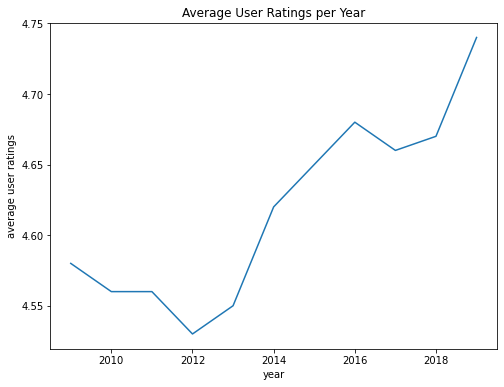

In [19]:
# plotting the average ratings for each year
plt.plot(years, yearly_ratings)
plt.title('Average User Ratings per Year')
plt.xlabel('year')
plt.ylabel('average user ratings')
plt.show()

The average user ratings show a general upward trend from 2012. Before that, the trend line was decreasing.

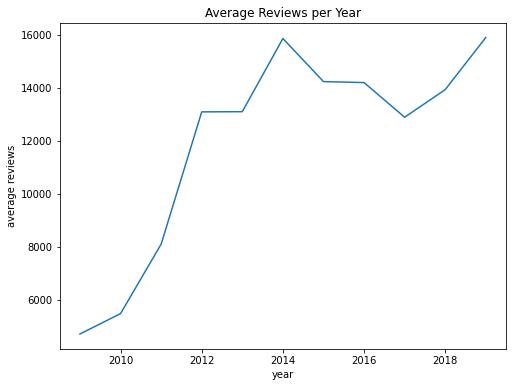

In [20]:
# plotting the average reviews for each year
plt.plot(years, yearly_reviews)
plt.title('Average Reviews per Year')
plt.xlabel('year')
plt.ylabel('average reviews')
plt.show()

The average number of reviews are on an upwards/increasing trend, peaking at 2014.

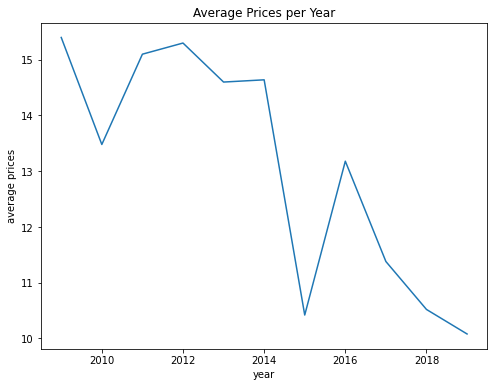

In [21]:
# plotting the average prices for each year
plt.plot(years, yearly_prices)
plt.title('Average Prices per Year')
plt.xlabel('year')
plt.ylabel('average prices')
plt.show()

The average prices show a declining trend from 2014.

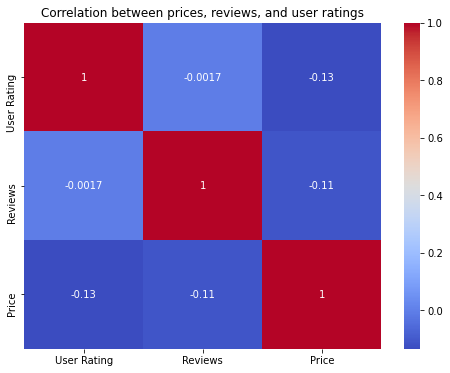

In [22]:
# is there a correlation between the prices, the number of reviews, and the user ratings?
df2 = df[['User Rating', 'Reviews', 'Price']]
sns.heatmap(df2.corr(), cmap = 'coolwarm', annot = True)
plt.title("Correlation between prices, reviews, and user ratings")
plt.show()

There does not seem to be any correlations between the three variables.